In [29]:
'''
(1) Train a hand written digits model

(2) Export to a disk and check the size of that model

(3) Use two techniques for quantization (1) post training quantization (3) quantization aware training'''

'\n(1) Train a hand written digits model\n\n(2) Export to a disk and check the size of that model\n\n(3) Use two techniques for quantization (1) post training quantization (3) quantization aware training'

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# test, train splt using hand written dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
len(X_train)

60000

In [33]:
len(X_test)

10000

In [34]:
X_train[0].shape

(28, 28)

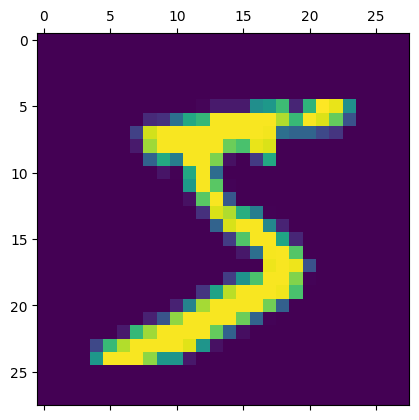

In [35]:
plt.matshow(X_train[0])

In [36]:
y_train[0]

5

In [37]:
X_train = X_train / 255
X_test = X_test / 255

In [38]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [39]:
X_train_flattened.shape

(60000, 784)

In [40]:
#Using Flatten layer so that we don't have to call .reshape on input dataset

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2745 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0659 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9833


In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9748


[0.08122190088033676, 0.9747999906539917]

In [43]:
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


In [44]:
# (1) Post training quantization

In [45]:
# Without quantization

In [ ]:
# converting model that have finished training to lite version using tf.lite converter
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model") # model loaded from disk
tflite_model = converter.convert()

In [47]:
# With quantization

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model") # model loaded from disk
converter.optimizations = [tf.lite.Optimize.DEFAULT] # add this optimization line.
tflite_quant_model = converter.convert()

In [ ]:
# size of model without  quantization.
len(tflite_model)

320040

In [ ]:
# size of model with quantization.
len(tflite_quant_model)

84912

In [51]:
# You can see above that quantizated model is 1/4th the size of a non quantized model

In [ ]:
#save model to a file.
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
#save model to a file.
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

In [ ]:
# Once you have above files saved to a disk, check their sizes. Quantized model will be having less size.

In [55]:
# (2) Quantization aware training

In [ ]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model # import quantization from tensor flow

# applying quantize_model function on our original training tf model.
q_aware_model = quantize_model(model) 

# `quantize_model` requires a recompile. (this model is already compiled, we are recompiling it.)
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 784)              1         
 apperV2)                                                        
                                                                 
 quant_dense_2 (QuantizeWrap  (None, 100)              78505     
 perV2)                                                          
                                                                 
 quant_dense_3 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-trai

In [57]:
q_aware_model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 10s 4ms/step - loss: 0.0436 - accuracy: 0.9858


In [58]:
q_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9751


[0.08296483010053635, 0.9750999808311462]

In [ ]:
# finally converting our fine tuned model to lite version using tf.lite
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model) # # model loaded keras 
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\fasil\AppData\Local\Temp\tmpchxn31qo\assets


INFO:tensorflow:Assets written to: C:\Users\fasil\AppData\Local\Temp\tmpchxn31qo\assets
c:\Users\fasil\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [60]:
len(tflite_qaware_model)

82776

In [ ]:
with open("tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)
# model extension here is .tflite